In [323]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
env = SphericalTank(start_state = np.array([2.0]))

print(env.reset())
print(env.step(np.array([0.0])))

(array([2.]), '')
[2.]
(array([-1.13519657]), -28.379914271419587, False, False, {})


[3.8]
[3.79949505]
[3.79902248]
[3.79858005]
[3.79816574]
[3.79777764]
[3.79741402]
[3.79707324]
[3.7967538]
[3.79645431]
[3.79617346]
[3.79591006]
[3.79566296]
[3.79543114]
[3.79521361]
[3.79500946]
[3.79481786]
[3.79463799]
[3.79446914]
[3.7943106]
[3.79416174]
[3.79402195]
[3.79389066]
[3.79376735]
[3.79365153]
[3.79354273]
[3.79344052]
[3.79334449]
[3.79325427]
[3.79316951]
[3.79308985]
[3.79301501]
[3.79294467]
[3.79287858]
[3.79281646]
[3.79275808]
[3.79270321]
[3.79265163]
[3.79260316]
[3.7925576]
[3.79251477]
[3.79247451]
[3.79243667]
[3.79240109]
[3.79236765]
[3.79233621]
[3.79230665]
[3.79227887]
[3.79225275]
[3.79222819]
[3.7922051]
[3.79218339]
[3.79216298]
[3.79214379]
[3.79212575]
[3.79210879]
[3.79209284]
[3.79207784]
[3.79206374]
[3.79205049]
[3.79203802]
[3.7920263]
[3.79201528]
[3.79200492]
[3.79199517]
[3.79198601]
[3.7919774]
[3.7919693]
[3.79196168]
[3.79195452]
[3.79194778]
[3.79194145]
[3.7919355]
[3.7919299]
[3.79192463]
[3.79191968]
[3.79191503]
[3.79191065]
[3

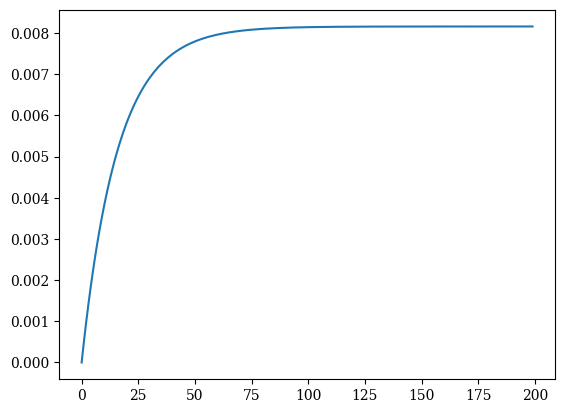

In [5]:
env = SphericalTank(start_state = np.array([3.8]), desired_state=np.array([3.8]))

env.reset()
# plot step response
obs, info = env.reset()
# run episode with action 5
terminated = False
truncated = False
observations = []
while not (terminated or truncated):
    observations.append(obs)
    obs, reward, terminated, truncated, info = env.step(np.array([11.2129 * 1]))

plt.plot(observations)

# Set points 0.8, 2, 0.38
# Should be killed for more than 4 or lower than 0
# At 3.8 the settling time is 7s, so we can change the setpoint every 7s 
# We want to train for a trajectory of setpoints 
    

In [50]:
tank_agent, tank_env = train_default_sac(env_type = 'sphericaltank', desired_state=3.0, seed = 42, n_episodes = 50)
# tank_agent = SAC.load('models\\SphericalTank\\Desired2.0\\sac.zip')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/0521/Desired3.0/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -256     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 36       |
|    time_elapsed    | 21       |
|    total_timesteps | 800      |
| train/             |          |
|    actor_loss      | 3.77     |
|    critic_loss     | 0.00515  |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 699      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -206     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 34       |
|    time_elapsed    | 46       |
|    total_timesteps | 1600     |


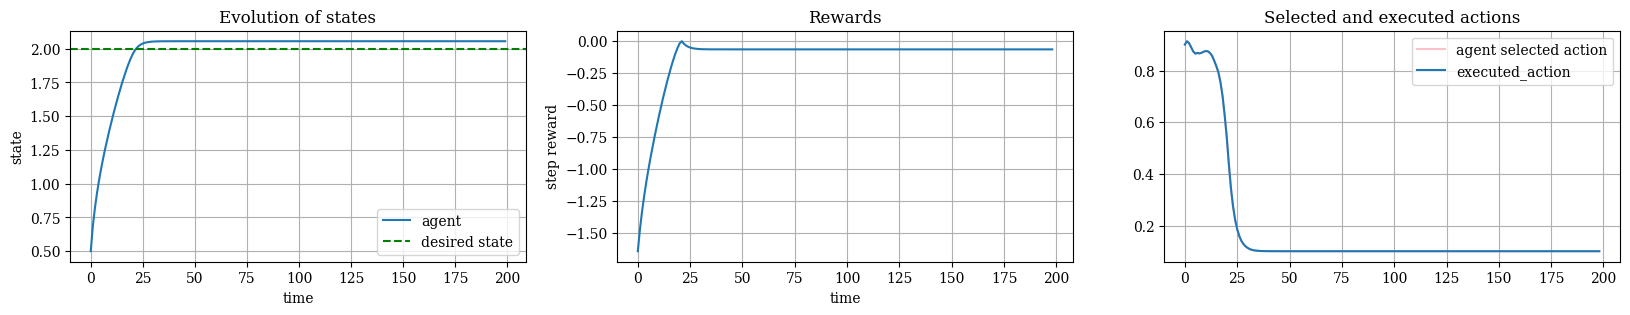

In [59]:
tank_env = RescaleAction(SphericalTank(desired_state=np.array([2.0]), start_state=np.array([0.5])))
states, actions, rewards, avg_rewards, executed = test_agent(tank_agent, RescaleAction(tank_env), deterministic=True)
plot_test(RescaleAction(tank_env), - (states - tank_env.unwrapped.desired_state), rewards, actions, executed)

In [ ]:
df = pd.read_csv('logs\train\SphericalTank\0521\Desired3.0\sac\progress.csv')

## Two setpoints

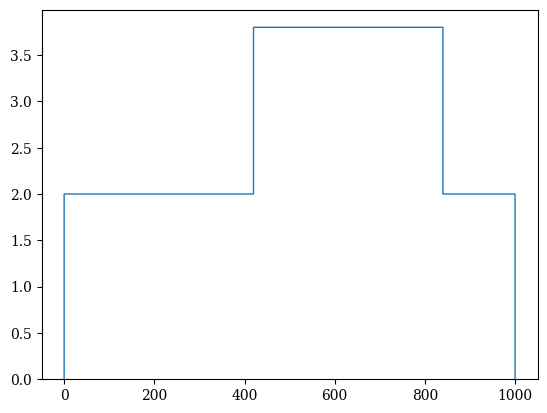

In [11]:
env = SphericalTank(desired_state=np.array([2.0, 3.8]), max_episode_len=200 * 5)
plt.stairs(env.desired_trajectory)

In [12]:
tank_db_agent, tank_db_env = train_default_sac(core_env = env, desired_state=[2.0, 3.8], seed = 42, n_episodes = 50)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/0521/Desired[2.0, 3.8]/sac
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -4.46e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 13        |
|    time_elapsed    | 306       |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 59.1      |
|    critic_loss     | 8.02      |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 3899      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -3.38e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 13        |
|    time_elapsed    | 606       |
|  

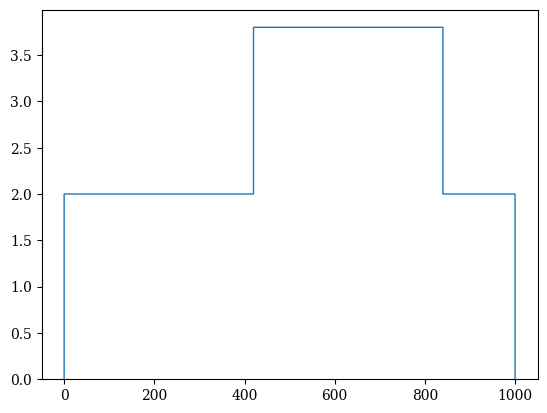

In [16]:
tank_db_env = RescaleAction(SphericalTank(desired_state=np.array([2.5, 0.8]), max_episode_len=200 * 5))
test_agent =  SAC.load('models\\SphericalTank\\Desired[2.0, 3.8]\\sac.zip')
plt.stairs(tank_db_env.desired_trajectory)
states, actions, rewards, avg, executed = test_agent(test_agent, RescaleAction(tank_db_env), deterministic=True, state_error=True)

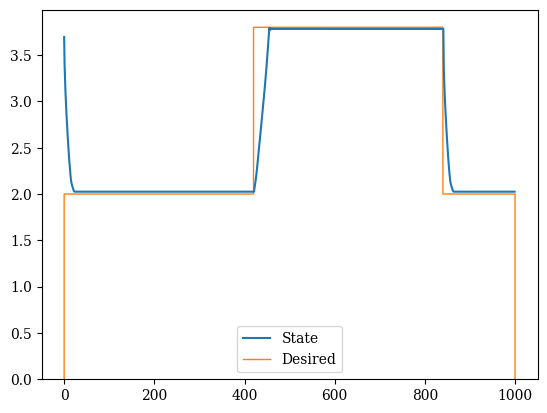

In [18]:
plt.plot((np.array(states)))
plt.stairs(np.array(tank_db_env.desired_trajectory))
plt.legend(['State', 'Desired'])

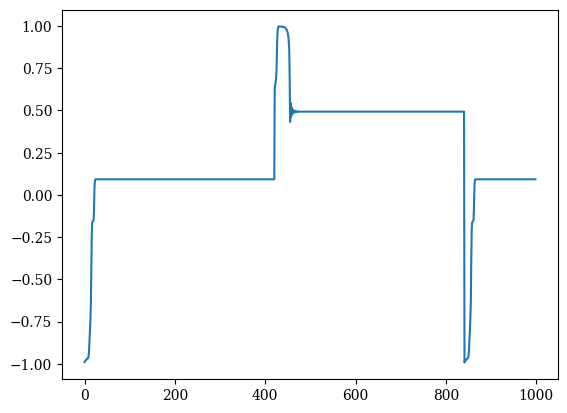

In [19]:
plt.plot(np.array(executed))

In [115]:
np.array(states).shape
np.array(tank_db_env.desired_trajectory).reshape(np.array(states).shape).shape

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.desired_trajectory to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desired_trajectory` for environment variables or `env.get_wrapper_attr('desired_trajectory')` that will search the reminding wrappers.
  logger.warn(


(1000, 1)

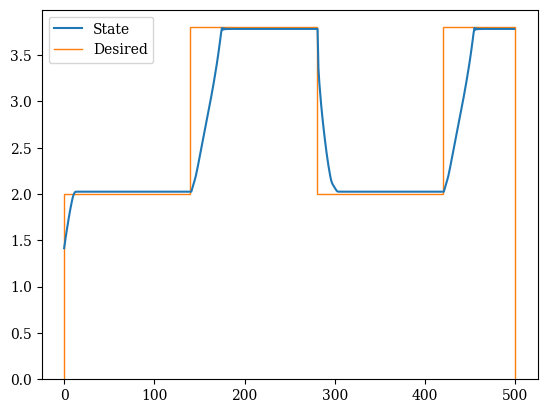

In [36]:
tank_db_agent = SAC.load()
test_env = RescaleAction(SphericalTank(desired_state=np.array([2.0, 3.8]), max_episode_len=100 * 5))
states, actions, rewards, avg, executed = test_agent(tank_db_agent, test_env, deterministic=True, state_error=True)
plt.plot((np.array(states)))
plt.stairs(np.array(test_env.desired_trajectory))
plt.legend(['State', 'Desired'])

### All three setpoints

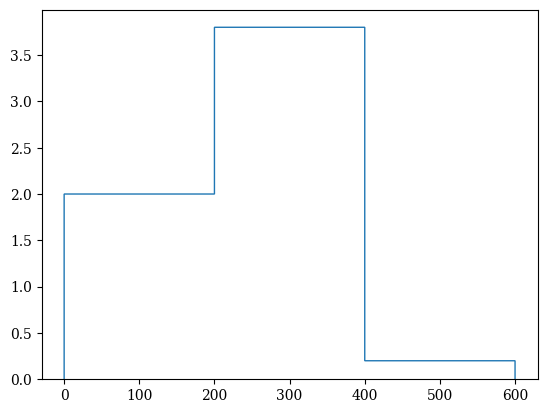

In [248]:
env= SphericalTank(desired_state=np.array([0.2, 2.0, 3.8]), max_episode_len=600)
plt.stairs(env.desired_trajectory)
# tank_db_agent, tank_db_env = train_default_sac(core_env = env, desired_state=[2.0, 3.8], seed = 42, n_episodes = 50)

In [325]:
tank_db_agent, tank_db_env = train_default_sac(core_env = env, desired_state=[0.2, 2.0, 3.7], seed = 42, n_episodes = 100, observe_error=True)

Wrapping in observe error
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/0522/Desired[0.2, 2.0, 3.7]/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 600      |
|    ep_rew_mean     | -678     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 45       |
|    time_elapsed    | 52       |
|    total_timesteps | 2400     |
| train/             |          |
|    actor_loss      | 6.77     |
|    critic_loss     | 0.375    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 2299     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 600      |
|    ep_rew_mean     | -666     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 44       |
|    time_elapsed    | 108    

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\Desired[0.2, 2.0, 3.7]' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [257]:
test_env = copy.deepcopy(env)
test_env.start_state = np.array([3.999999999999])
state, info = env.reset()
print(f"State is {test_env.state} and desired state is {test_env.desired_state}: error {state}")
for i in range(20):
    state, reward, terminated, truncated, info = test_env.step(np.array([15.0]))
    if (terminated or truncated):
        break 
    print(f"State is {test_env.state} and desired state is {test_env.desired_state}: error {state}")

State is [1.91974711] and desired state is [2.]: error [-1.7420783]
State is [1.97571348] and desired state is [2.]: error [0.02428652]
State is [2.03067903] and desired state is [2.]: error [-0.03067903]
State is [2.0847594] and desired state is [2.]: error [-0.0847594]
State is [2.13805898] and desired state is [2.]: error [-0.13805898]
State is [2.19067311] and desired state is [2.]: error [-0.19067311]
State is [2.24268992] and desired state is [2.]: error [-0.24268992]
State is [2.2941918] and desired state is [2.]: error [-0.2941918]
State is [2.34525678] and desired state is [2.]: error [-0.34525678]
State is [2.39595964] and desired state is [2.]: error [-0.39595964]
State is [2.44637304] and desired state is [2.]: error [-0.44637304]
State is [2.49656844] and desired state is [2.]: error [-0.49656844]
State is [2.54661722] and desired state is [2.]: error [-0.54661722]
State is [2.59659157] and desired state is [2.]: error [-0.59659157]
State is [2.64656565] and desired state 

Initial error [-0.8] with desired state [0.2] and state [1.]
Initial state was [-0.8]
Terminated at 47 with state [4.10889641] and reward -11098.736295225217 and initial state [2.18138024]


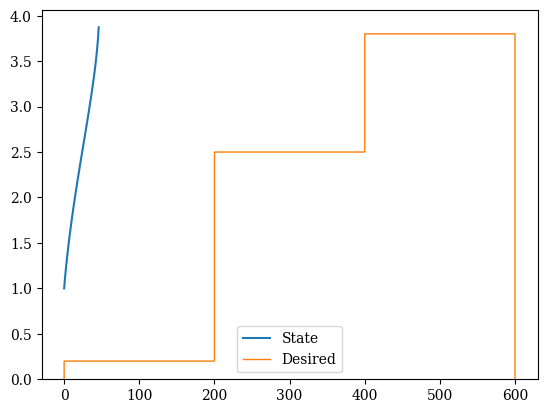

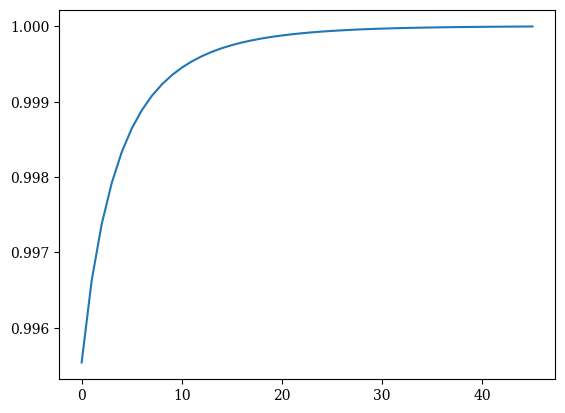

In [331]:
# tank_db_agent = SAC.load('models\\SphericalTank\\Desired[0.3, 2.0, 3.7]\\sac.zip')
# test_env = RescaleAction(ObserveError(copy.deepcopy(env)))
test_env = RescaleAction(ObserveError(SphericalTank(desired_state=np.array([0.2, 2.5, 3.8]), max_episode_len=600)))
states, actions, rewards, avg, executed = test_agent(tank_db_agent, test_env, deterministic=True, state_error=True)
start = 0
stop = 600
plt.plot((np.array(states))[start:stop])
plt.stairs(np.array(test_env.unwrapped.desired_trajectory)[start:stop])
plt.legend(['State', 'Desired'])
plt.figure()
plt.plot(np.array(executed)[start:stop])